In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [37]:
cleaned_dataset = pd.read_csv('../data/feature-engineered/feature_engineered_youtube_data.csv')
cleaned_dataset

,video_id,category_id,country,tags,definition,channel_id,channel_title,logged_at_initial,view_count_initial,like_count_initial,...,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,comment_count_difference,avg_comment_diff_per_category,subscriber_count_difference,engagement_score,channel_authority
0,__IUOSUx2Ro,27.0,unknown,unknown,hd,UCvVOAUWFzGEAJm03iDkfPpQ,Japan Di19,2025-07-27 09:01:26,0.0,0.0,...,09:00:08,0.0,0.0,300.362587,22.774827,0.0,0.854503,0.0,0.000000,1.386294
1,__MczZuTEoI,17.0,AU,"live motorsport,perth to do,wa sporting car cl...",hd,UCtTQsMEBxOg4yURWrOb7wYw,WA Sporting Car Club,2025-07-27 15:01:21,2710.0,58.0,...,14:43:04,616.0,-1.0,4817.223704,47.721481,0.0,3.145185,1.0,0.009740,6.792344
2,__nPCyY_-sI,20.0,unknown,"Documentary,Horror Gaming,Retro Gaming,Horror,...",hd,UCMi56Zg-E9SqsPaIKaD6_iw,Raincitygaming,2025-07-28 01:01:24,1.0,1.0,...,00:04:51,1.0,0.0,7645.363724,51.029271,0.0,1.497601,1.0,7.000000,5.723585
3,__OZ3lGz47E,22.0,unknown,unknown,hd,UCZ9MrsK5-l2yEYAgDG9C_hQ,mino _ yuu,2025-07-27 11:01:21,42.0,0.0,...,10:45:35,26.0,2.0,670.803917,29.050021,3.0,0.814764,1.0,0.692308,3.367296
4,__TYUnYP-ak,22.0,US,"HFY,HFY Story,HFY Short Story,HFY War,Science ...",hd,UC4iOj0BLhqE0rzL3-s0hlwg,GalacticZen HFY,2025-07-26 22:01:23,1.0,0.0,...,21:55:22,24.0,0.0,670.803917,29.050021,0.0,0.814764,0.0,0.000000,9.532496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,ZzsCkP9NYLM,22.0,unknown,unknown,hd,UC8EscvXF1Bd_Uxnqz4uFARA,Purple colour 490,2025-07-26 17:01:48,0.0,0.0,...,16:09:03,NaN,NaN,670.803917,29.050021,NaN,0.814764,NaN,NaN,6.473891
21337,ZzubCmW6eaw,22.0,IN,unknown,hd,UCfMJUDYtQov5-Cj3PXPqa0w,Cup Of You,2025-07-26 22:01:53,5.0,2.0,...,21:05:44,4.0,1.0,670.803917,29.050021,0.0,0.814764,0.0,0.250000,1.791759
21338,zzwMUiPlePQ,24.0,US,"shift,getshifted,bikini,fashion,swimwear,beach...",hd,UCtdLtIKzgme3iaYy2n7x7eA,SHIFT,2025-07-27 18:03:03,7465.0,181.0,...,17:31:13,236.0,11.0,1524.117774,66.837946,0.0,3.117159,0.0,0.046610,13.845070
21339,ZzWTSByOJGg,1.0,unknown,#short film,hd,UC4mNhgI00EHUy99LxOXEDsA,j_k movies,2025-07-26 22:01:53,0.0,0.0,...,21:56:23,0.0,0.0,620.658977,35.607823,0.0,1.852558,0.0,0.000000,0.693147


In [38]:
scaler = StandardScaler()
cleaned_dataset[['c_subscriber_count_initial', 'c_subscriber_count_final']] = scaler.fit_transform(
    cleaned_dataset[['c_subscriber_count_initial', 'c_subscriber_count_final']]
)

In [39]:
cleaned_dataset['c_subscriber_count_initial']


0       -0.121576
1       -0.121324
2       -0.121490
3       -0.121569
4       -0.117649
           ...   
21336   -0.121393
21337   -0.121576
21338    0.171596
21339   -0.121577
21340   -0.119673
Name: c_subscriber_count_initial, Length: 21341, dtype: float64

In [40]:
cleaned_dataset.columns

Index(['video_id', 'category_id', 'country', 'tags', 'definition',
       'channel_id', 'channel_title', 'logged_at_initial',
       'view_count_initial', 'like_count_initial', 'comment_count_initial',
       'c_view_count_initial', 'c_subscriber_count_initial', 'logged_at_final',
       'view_count_final', 'like_count_final', 'comment_count_final',
       'c_view_count_final', 'c_subscriber_count_final', 'published_year',
       'published_month', 'published_day_of_week', 'published_time',
       'view_count_difference', 'like_count_difference',
       'avg_view_diff_per_category', 'avg_likes_diff_per_category',
       'comment_count_difference', 'avg_comment_diff_per_category',
       'subscriber_count_difference', 'engagement_score', 'channel_authority'],
      dtype='object')

In [52]:
cleaned_dataset.shape

(21341, 20)

In [41]:
correlation_matrix = cleaned_dataset.corr(numeric_only=True).abs()
correlation_matrix

,category_id,view_count_initial,like_count_initial,comment_count_initial,c_view_count_initial,c_subscriber_count_initial,view_count_final,like_count_final,comment_count_final,c_view_count_final,...,published_month,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,comment_count_difference,avg_comment_diff_per_category,subscriber_count_difference,engagement_score,channel_authority
category_id,1.000000,0.010191,0.005857,0.001494,0.042387,0.043799,0.008220,0.001766,0.000746,0.044211,...,0.001926,0.003756,0.008453,0.031200,0.157097,0.002806,0.043831,0.001154,0.002954,0.004910
view_count_initial,0.010191,1.000000,0.691851,0.100011,0.070572,0.078537,0.852441,0.651386,0.086820,0.061474,...,0.000363,0.306668,0.108674,0.104509,0.047044,0.063040,0.048002,0.022032,0.000391,0.136024
like_count_initial,0.005857,0.691851,1.000000,0.206014,0.043544,0.051457,0.614436,0.958357,0.176690,0.033476,...,0.000340,0.262784,0.194462,0.093142,0.044467,0.123813,0.030568,0.022298,0.000167,0.115015
comment_count_initial,0.001494,0.100011,0.206014,1.000000,0.064489,0.074348,0.122190,0.335551,0.929842,0.063628,...,0.003125,0.099194,0.514486,0.023783,0.058035,0.734166,0.056909,0.028673,0.000463,0.141791
c_view_count_initial,0.042387,0.070572,0.043544,0.064489,1.000000,0.940526,0.071962,0.058745,0.071449,1.000000,...,0.000710,0.054465,0.098101,0.015088,0.064620,0.069384,0.147087,0.064848,0.000775,0.249389
c_subscriber_count_initial,0.043799,0.078537,0.051457,0.074348,0.940526,1.000000,0.078595,0.068003,0.080469,0.940390,...,0.000823,0.054293,0.098918,0.009458,0.069634,0.076319,0.170030,0.060323,0.000792,0.284748
view_count_final,0.008220,0.852441,0.614436,0.122190,0.071962,0.078595,1.000000,0.608250,0.120188,0.071967,...,0.000603,0.759048,0.186123,0.137942,0.061047,0.101832,0.046541,0.028529,0.001602,0.158522
like_count_final,0.001766,0.651386,0.958357,0.335551,0.058745,0.068003,0.608250,1.000000,0.325793,0.058750,...,0.000055,0.296214,0.466487,0.091301,0.056699,0.271783,0.040299,0.046048,0.000374,0.156727
comment_count_final,0.000746,0.086820,0.176690,0.929842,0.071449,0.080469,0.120188,0.325793,1.000000,0.071450,...,0.001298,0.110695,0.571781,0.019338,0.057474,0.932491,0.063686,0.037309,0.000445,0.148017
c_view_count_final,0.044211,0.061474,0.033476,0.063628,1.000000,0.940390,0.071967,0.058750,0.071450,1.000000,...,0.000727,0.054469,0.098110,0.015062,0.065697,0.069384,0.148608,0.064902,0.000775,0.250852


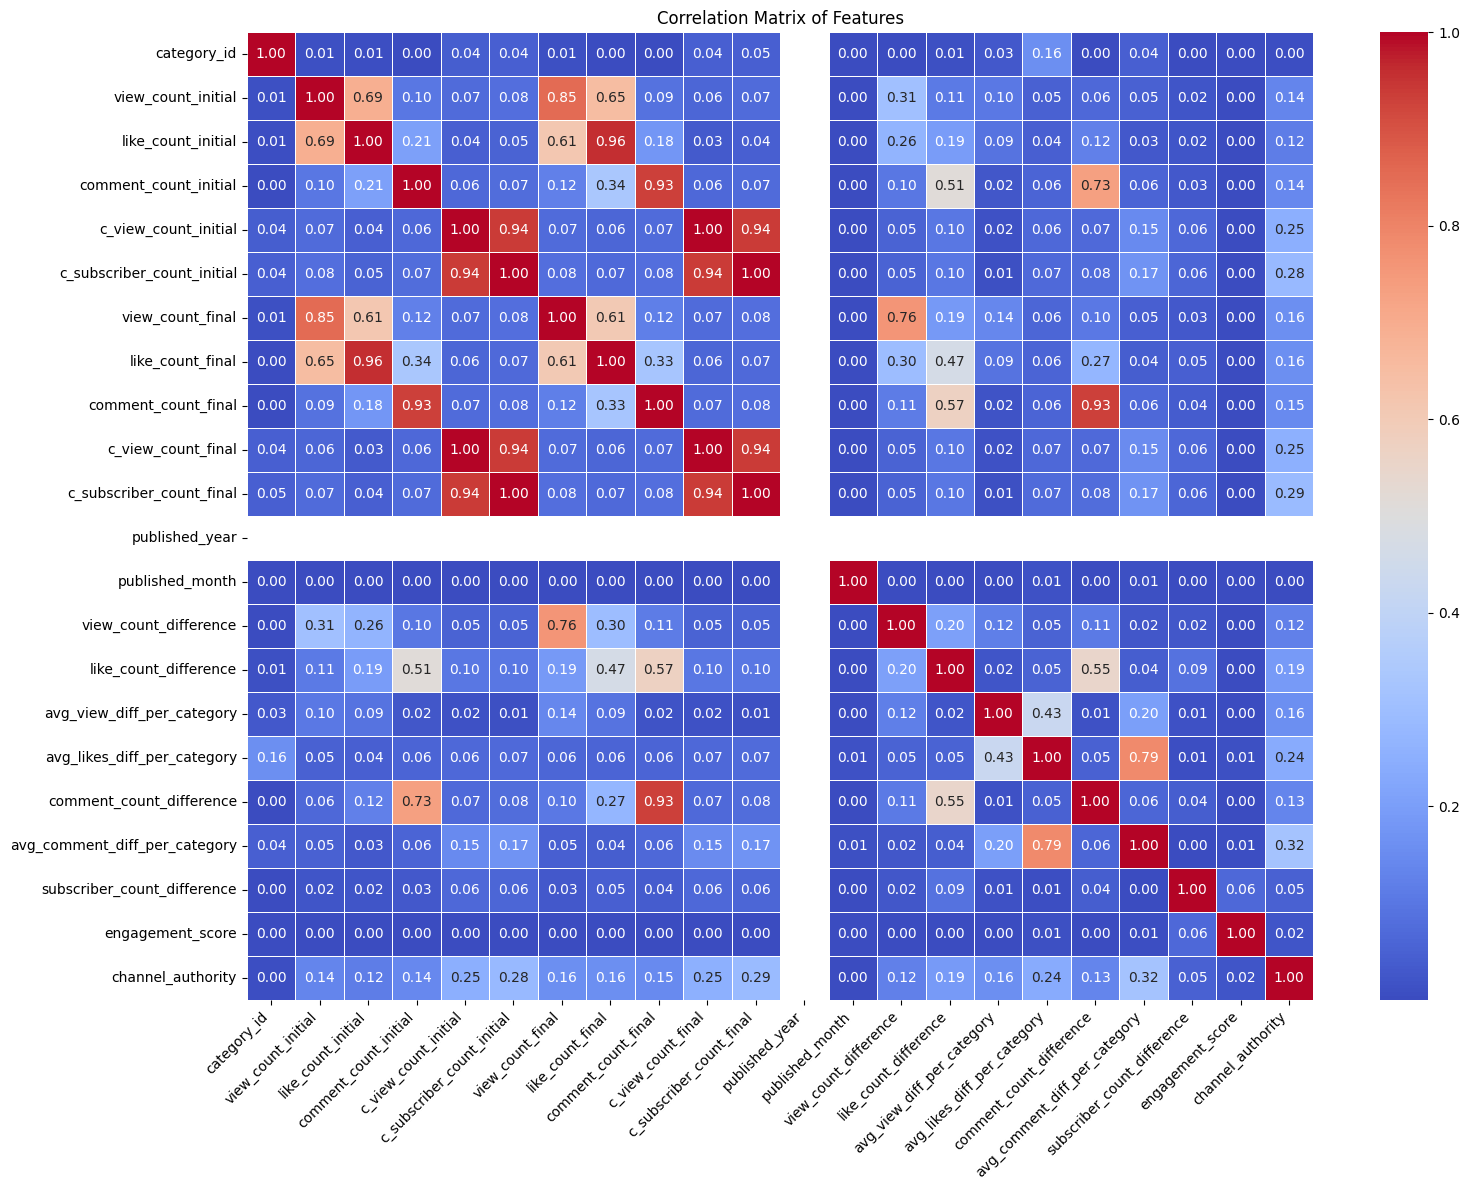

In [42]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [43]:
# Select upper triangle of correlation matrix to avoid duplicates
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.9
high_corr_pairs = [
    (column, row, upper_tri.loc[row, column])
    for column in upper_tri.columns
    for row in upper_tri.index
    if upper_tri.loc[row, column] > 0.9
]

# Sort by correlation strength (optional)
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} ↔ {feature2}: {corr_value:.2f}")

c_view_count_final ↔ c_view_count_initial: 1.00
c_subscriber_count_final ↔ c_subscriber_count_initial: 1.00
like_count_final ↔ like_count_initial: 0.96
c_subscriber_count_initial ↔ c_view_count_initial: 0.94
c_subscriber_count_final ↔ c_view_count_final: 0.94
c_subscriber_count_final ↔ c_view_count_initial: 0.94
c_view_count_final ↔ c_subscriber_count_initial: 0.94
comment_count_difference ↔ comment_count_final: 0.93
comment_count_final ↔ comment_count_initial: 0.93


In [44]:
columns_to_drop = [
    'c_subscriber_count_final',
    'c_view_count_final',
    'comment_count_final',
    'comment_count_initial',
    'comment_count_difference',
    'avg_comment_diff_per_category',
    'subscriber_count_difference',
    'video_id',
    'country',
    'channel_title',
]

cleaned_dataset.drop(columns=columns_to_drop, inplace=True)


In [45]:
cleaned_dataset

,category_id,tags,definition,channel_id,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,c_subscriber_count_initial,logged_at_final,...,published_year,published_month,published_day_of_week,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,engagement_score,channel_authority
0,27.0,unknown,hd,UCvVOAUWFzGEAJm03iDkfPpQ,2025-07-27 09:01:26,0.0,0.0,27.0,-0.121576,2025-07-27 10:00:04,...,2025,7,Sunday,09:00:08,0.0,0.0,300.362587,22.774827,0.000000,1.386294
1,17.0,"live motorsport,perth to do,wa sporting car cl...",hd,UCtTQsMEBxOg4yURWrOb7wYw,2025-07-27 15:01:21,2710.0,58.0,70705.0,-0.121324,2025-07-27 16:00:05,...,2025,7,Sunday,14:43:04,616.0,-1.0,4817.223704,47.721481,0.009740,6.792344
2,20.0,"Documentary,Horror Gaming,Retro Gaming,Horror,...",hd,UCMi56Zg-E9SqsPaIKaD6_iw,2025-07-28 01:01:24,1.0,1.0,155429.0,-0.121490,2025-07-28 02:00:04,...,2025,7,Monday,00:04:51,1.0,0.0,7645.363724,51.029271,7.000000,5.723585
3,22.0,unknown,hd,UCZ9MrsK5-l2yEYAgDG9C_hQ,2025-07-27 11:01:21,42.0,0.0,11.0,-0.121569,2025-07-27 12:00:04,...,2025,7,Sunday,10:45:35,26.0,2.0,670.803917,29.050021,0.692308,3.367296
4,22.0,"HFY,HFY Story,HFY Short Story,HFY War,Science ...",hd,UC4iOj0BLhqE0rzL3-s0hlwg,2025-07-26 22:01:23,1.0,0.0,5976551.0,-0.117649,2025-07-26 23:00:04,...,2025,7,Saturday,21:55:22,24.0,0.0,670.803917,29.050021,0.000000,9.532496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,22.0,unknown,hd,UC8EscvXF1Bd_Uxnqz4uFARA,2025-07-26 17:01:48,0.0,0.0,123072.0,-0.121393,NaN,...,2025,7,Saturday,16:09:03,NaN,NaN,670.803917,29.050021,NaN,6.473891
21337,22.0,unknown,hd,UCfMJUDYtQov5-Cj3PXPqa0w,2025-07-26 22:01:53,5.0,2.0,138.0,-0.121576,2025-07-26 23:00:33,...,2025,7,Saturday,21:05:44,4.0,1.0,670.803917,29.050021,0.250000,1.791759
21338,24.0,"shift,getshifted,bikini,fashion,swimwear,beach...",hd,UCtdLtIKzgme3iaYy2n7x7eA,2025-07-27 18:03:03,7465.0,181.0,384611587.0,0.171596,2025-07-27 19:00:33,...,2025,7,Sunday,17:31:13,236.0,11.0,1524.117774,66.837946,0.046610,13.845070
21339,1.0,#short film,hd,UC4mNhgI00EHUy99LxOXEDsA,2025-07-26 22:01:53,0.0,0.0,1858.0,-0.121577,2025-07-26 23:00:33,...,2025,7,Saturday,21:56:23,0.0,0.0,620.658977,35.607823,0.000000,0.693147


In [46]:
cleaned_dataset['logged_at_initial_hour'] = pd.to_datetime(cleaned_dataset['logged_at_initial']).dt.hour
cleaned_dataset['logged_at_final_hour'] = pd.to_datetime(cleaned_dataset['logged_at_final']).dt.hour


In [47]:
cleaned_dataset

,category_id,tags,definition,channel_id,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,c_subscriber_count_initial,logged_at_final,...,published_day_of_week,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,engagement_score,channel_authority,logged_at_initial_hour,logged_at_final_hour
0,27.0,unknown,hd,UCvVOAUWFzGEAJm03iDkfPpQ,2025-07-27 09:01:26,0.0,0.0,27.0,-0.121576,2025-07-27 10:00:04,...,Sunday,09:00:08,0.0,0.0,300.362587,22.774827,0.000000,1.386294,9.0,10.0
1,17.0,"live motorsport,perth to do,wa sporting car cl...",hd,UCtTQsMEBxOg4yURWrOb7wYw,2025-07-27 15:01:21,2710.0,58.0,70705.0,-0.121324,2025-07-27 16:00:05,...,Sunday,14:43:04,616.0,-1.0,4817.223704,47.721481,0.009740,6.792344,15.0,16.0
2,20.0,"Documentary,Horror Gaming,Retro Gaming,Horror,...",hd,UCMi56Zg-E9SqsPaIKaD6_iw,2025-07-28 01:01:24,1.0,1.0,155429.0,-0.121490,2025-07-28 02:00:04,...,Monday,00:04:51,1.0,0.0,7645.363724,51.029271,7.000000,5.723585,1.0,2.0
3,22.0,unknown,hd,UCZ9MrsK5-l2yEYAgDG9C_hQ,2025-07-27 11:01:21,42.0,0.0,11.0,-0.121569,2025-07-27 12:00:04,...,Sunday,10:45:35,26.0,2.0,670.803917,29.050021,0.692308,3.367296,11.0,12.0
4,22.0,"HFY,HFY Story,HFY Short Story,HFY War,Science ...",hd,UC4iOj0BLhqE0rzL3-s0hlwg,2025-07-26 22:01:23,1.0,0.0,5976551.0,-0.117649,2025-07-26 23:00:04,...,Saturday,21:55:22,24.0,0.0,670.803917,29.050021,0.000000,9.532496,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,22.0,unknown,hd,UC8EscvXF1Bd_Uxnqz4uFARA,2025-07-26 17:01:48,0.0,0.0,123072.0,-0.121393,NaN,...,Saturday,16:09:03,NaN,NaN,670.803917,29.050021,NaN,6.473891,17.0,NaN
21337,22.0,unknown,hd,UCfMJUDYtQov5-Cj3PXPqa0w,2025-07-26 22:01:53,5.0,2.0,138.0,-0.121576,2025-07-26 23:00:33,...,Saturday,21:05:44,4.0,1.0,670.803917,29.050021,0.250000,1.791759,22.0,23.0
21338,24.0,"shift,getshifted,bikini,fashion,swimwear,beach...",hd,UCtdLtIKzgme3iaYy2n7x7eA,2025-07-27 18:03:03,7465.0,181.0,384611587.0,0.171596,2025-07-27 19:00:33,...,Sunday,17:31:13,236.0,11.0,1524.117774,66.837946,0.046610,13.845070,18.0,19.0
21339,1.0,#short film,hd,UC4mNhgI00EHUy99LxOXEDsA,2025-07-26 22:01:53,0.0,0.0,1858.0,-0.121577,2025-07-26 23:00:33,...,Saturday,21:56:23,0.0,0.0,620.658977,35.607823,0.000000,0.693147,22.0,23.0


In [48]:
cleaned_dataset.drop(columns=['logged_at_initial','logged_at_final'], inplace=True)


In [49]:
cleaned_dataset

,category_id,tags,definition,channel_id,view_count_initial,like_count_initial,c_view_count_initial,c_subscriber_count_initial,view_count_final,like_count_final,...,published_day_of_week,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,engagement_score,channel_authority,logged_at_initial_hour,logged_at_final_hour
0,27.0,unknown,hd,UCvVOAUWFzGEAJm03iDkfPpQ,0.0,0.0,27.0,-0.121576,0.0,0.0,...,Sunday,09:00:08,0.0,0.0,300.362587,22.774827,0.000000,1.386294,9.0,10.0
1,17.0,"live motorsport,perth to do,wa sporting car cl...",hd,UCtTQsMEBxOg4yURWrOb7wYw,2710.0,58.0,70705.0,-0.121324,3326.0,57.0,...,Sunday,14:43:04,616.0,-1.0,4817.223704,47.721481,0.009740,6.792344,15.0,16.0
2,20.0,"Documentary,Horror Gaming,Retro Gaming,Horror,...",hd,UCMi56Zg-E9SqsPaIKaD6_iw,1.0,1.0,155429.0,-0.121490,2.0,1.0,...,Monday,00:04:51,1.0,0.0,7645.363724,51.029271,7.000000,5.723585,1.0,2.0
3,22.0,unknown,hd,UCZ9MrsK5-l2yEYAgDG9C_hQ,42.0,0.0,11.0,-0.121569,68.0,2.0,...,Sunday,10:45:35,26.0,2.0,670.803917,29.050021,0.692308,3.367296,11.0,12.0
4,22.0,"HFY,HFY Story,HFY Short Story,HFY War,Science ...",hd,UC4iOj0BLhqE0rzL3-s0hlwg,1.0,0.0,5976551.0,-0.117649,25.0,0.0,...,Saturday,21:55:22,24.0,0.0,670.803917,29.050021,0.000000,9.532496,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,22.0,unknown,hd,UC8EscvXF1Bd_Uxnqz4uFARA,0.0,0.0,123072.0,-0.121393,NaN,NaN,...,Saturday,16:09:03,NaN,NaN,670.803917,29.050021,NaN,6.473891,17.0,NaN
21337,22.0,unknown,hd,UCfMJUDYtQov5-Cj3PXPqa0w,5.0,2.0,138.0,-0.121576,9.0,3.0,...,Saturday,21:05:44,4.0,1.0,670.803917,29.050021,0.250000,1.791759,22.0,23.0
21338,24.0,"shift,getshifted,bikini,fashion,swimwear,beach...",hd,UCtdLtIKzgme3iaYy2n7x7eA,7465.0,181.0,384611587.0,0.171596,7701.0,192.0,...,Sunday,17:31:13,236.0,11.0,1524.117774,66.837946,0.046610,13.845070,18.0,19.0
21339,1.0,#short film,hd,UC4mNhgI00EHUy99LxOXEDsA,0.0,0.0,1858.0,-0.121577,0.0,0.0,...,Saturday,21:56:23,0.0,0.0,620.658977,35.607823,0.000000,0.693147,22.0,23.0


In [50]:
cleaned_dataset.drop(columns=['channel_id', 'tags'], inplace=True)


In [51]:
cleaned_dataset.to_csv('../data/pre-processed/preprocessed_youtube_data.csv', index=False)